## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [05] : [Regresi dan Induksi Pohon Keputusan] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [73]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Fernando Khorasani"
myNIM = "43088"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Fernando Khorasani
NIM: 		43088
Start: 		2022-09-14 20:08:58.145096
Device ID: 	64bab4d9-342e-11ed-84fb-5405db3707d4



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [13]:
# Your codes are here (replace the following codes)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

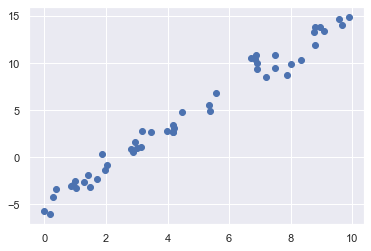

In [14]:
rng = np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)
plt.scatter(x,y)

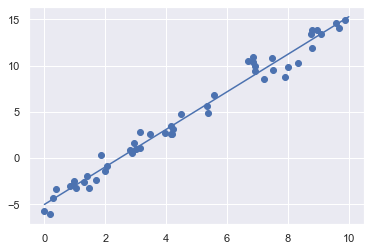

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [16]:
print("Model slope: ", model.coef_[0])
print("Model intercept", model.intercept_)

Model slope:  2.027208810360695
Model intercept -4.998577085553202


In [17]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


In [18]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])

poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [19]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

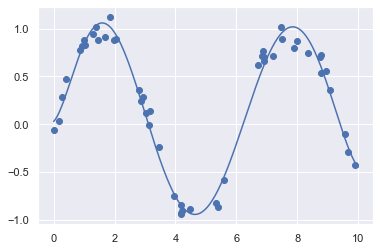

In [20]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict (xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot (xfit, yfit);

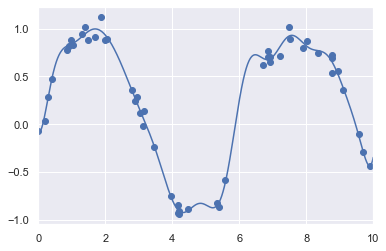

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
# """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
                      
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                        self.width_, axis=1)

 

gauss_model = make_pipeline (GaussianFeatures(20),
            LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)

yfit = gauss_model.predict (xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

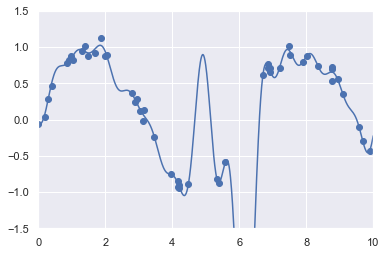

In [22]:
model = make_pipeline (GaussianFeatures (30),
LinearRegression())
model. fit (x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot (xfit, model.predict (xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

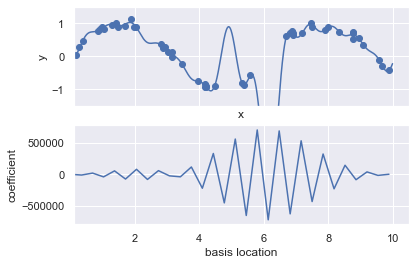

In [23]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
              model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0.10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

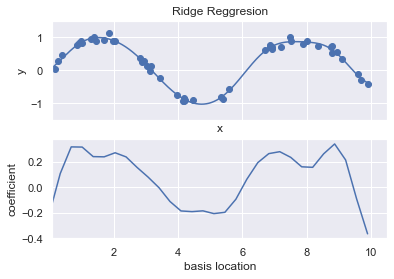

In [24]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Reggresion')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870486668, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


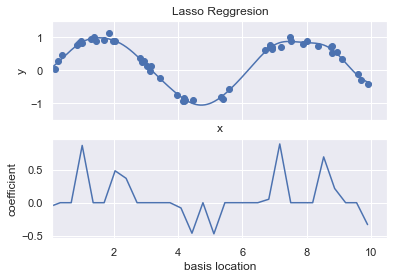

In [25]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Reggresion')

In [26]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [27]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

In [28]:
days= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0,inplace=True)

(8.0, 17.0)

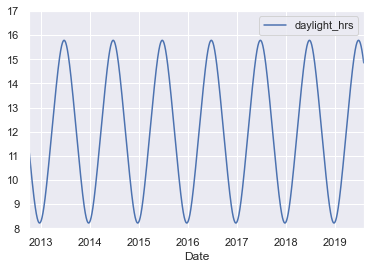

In [30]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000,12,21)).days
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m,0,2)))/180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8,17)

In [31]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [32]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [33]:
daily.head()

Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   
2012-10-07  2142.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0     11.045208   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-03   0.0     13.35      1.0  0.000000  
2012-10-04   0.0     13.60      1.0  0.002740  
2012-10-05   0.0     15.30      1.0  0.005479  
2012-10-06   0.0     15.85      1.0  0.008219  
2012-10-07   0.0     15.85      1.0  0.010959

In [34]:
# drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept = False)
model.fit(X,y)
daily['predicted'] = model.predict(X)

<AxesSubplot:xlabel='Date'>

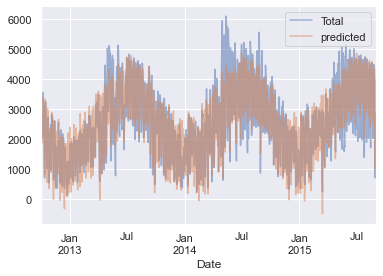

In [35]:
daily[['Total', 'predicted']].plot(alpha = 0.5)

In [36]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

In [37]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_ for i in range(1000)],0)

In [38]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


In [110]:
!pip install mglearn

In [39]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

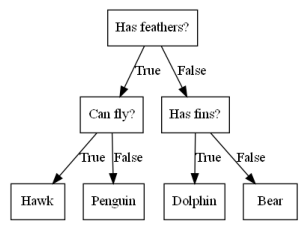

In [40]:
mglearn.plots.plot_animal_tree()

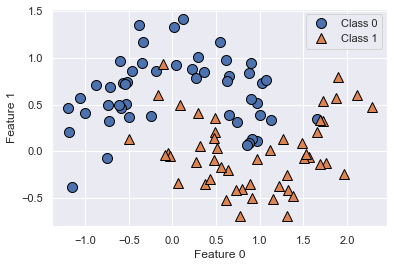

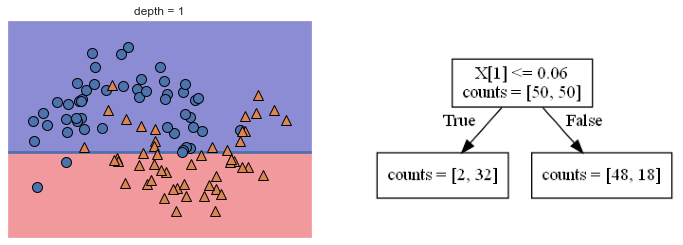

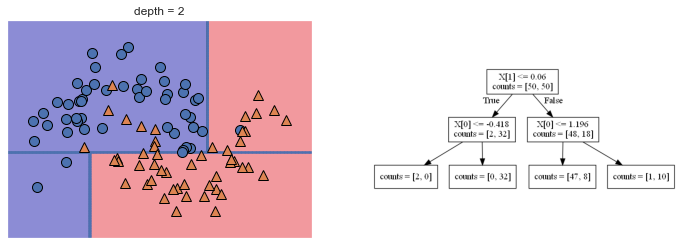

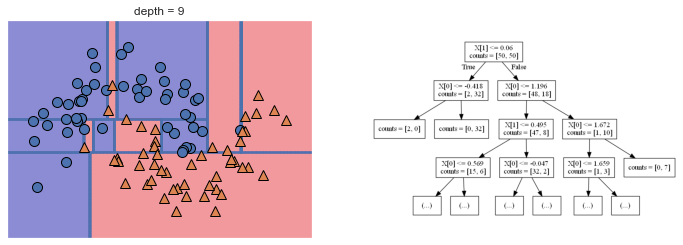

In [41]:
mglearn.plots.plot_tree_progressive()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
print("Accuravy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuravy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuravy on training set: 1.000
Accuravy on test set: 0.937


In [43]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

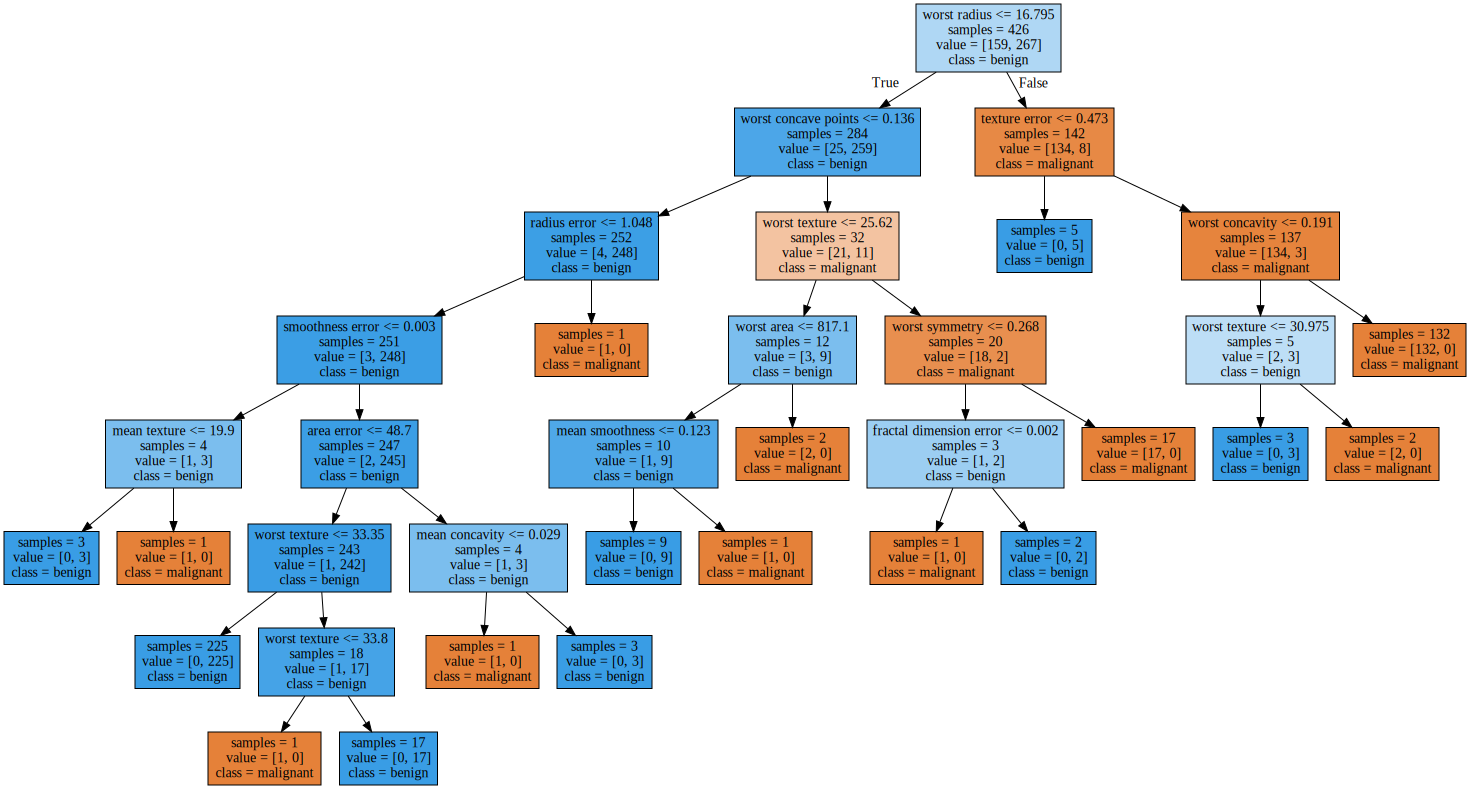

In [44]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [45]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


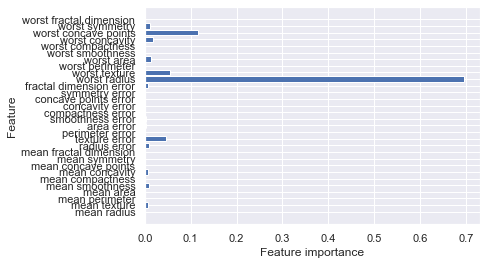

In [47]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


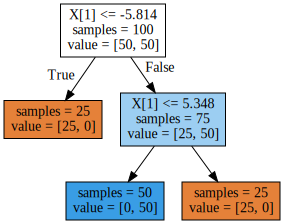

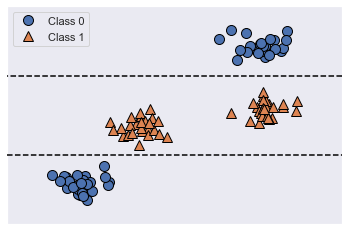

In [48]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [52]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0, 0.5, 'Price in $/Mbyte')

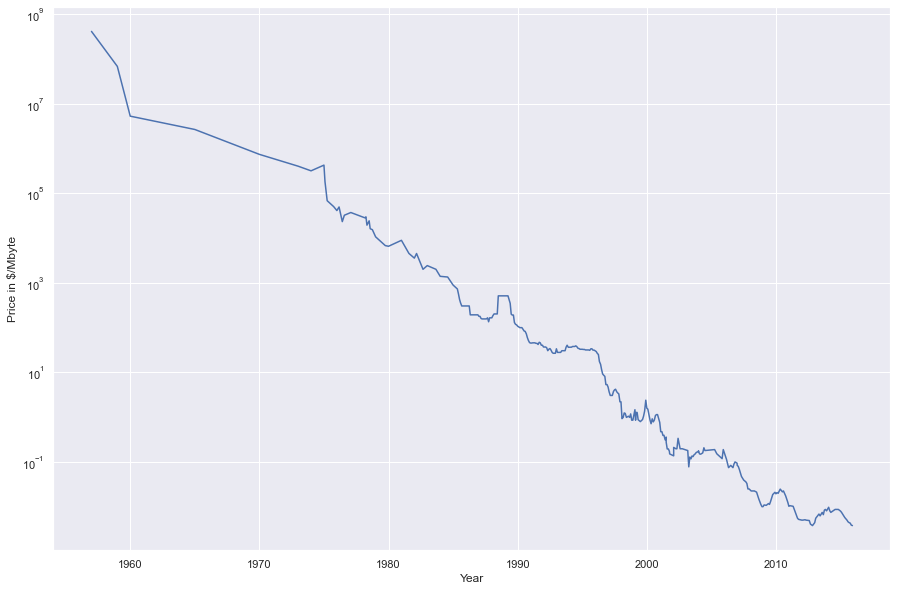

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel("Price in $/Mbyte")

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = np.array(data_train.date)[:,np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train,y_train)
linear_reg = LinearRegression().fit(X_train,y_train)
X_all = np.array(ram_prices.date)[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

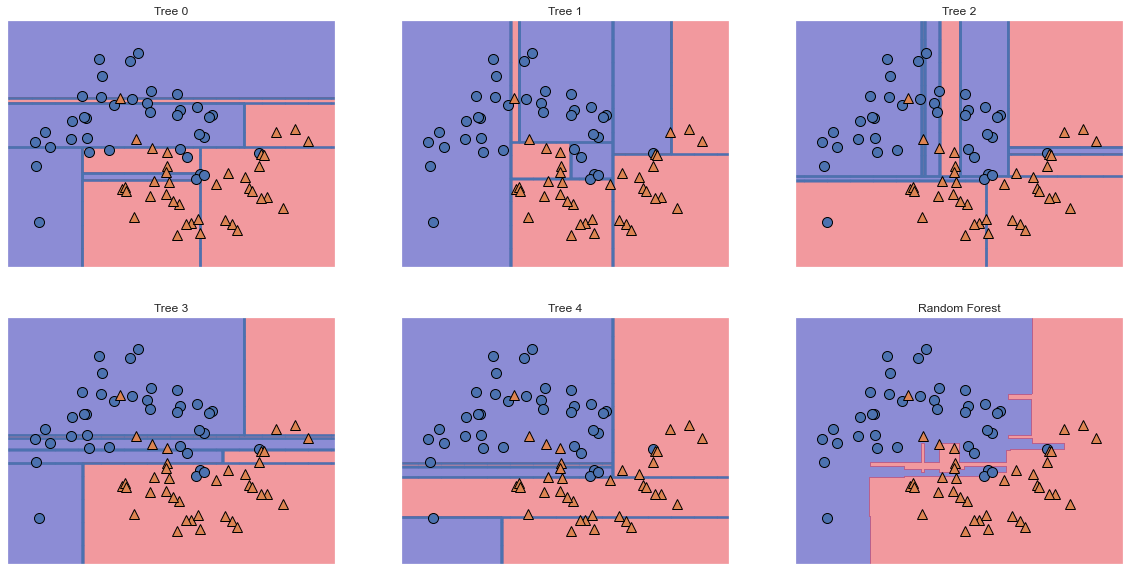

In [70]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.972


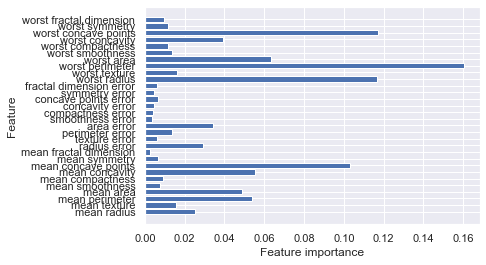

In [75]:
plot_feature_importances_cancer(forest)

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Regresi linear dapat digunakan untuk mengetahui relasi antar variabel, bisa dari dataset yang berbeda
    - Dari kedua dataset masih kurang informasi, sehingga efek nonlinear dan tren nonlinear tidak dapat diwujudkan. Dan selain itu masih ada hal yang diabaikan
    - hasil dari itu 129 ± 9 orang memilih untuk bersepeda saat 'daylight', ketika suhu naik 1 derajat celcius sebanyak  65 ± 4 orang bersepeda, saat cuaca kering ada 548 ± 33 pengendara sepeda, dan ada 27 ± 18 pengendara sepeda baru setiap tahunnya
    - Jadi untuk membandingkan atau mengetahui relasi dari 2 set atau lebih kita dapat menggunakan regresi linear, dan regresi linear itu sendiripun memiliki banyak jenis yang dapat disesuaikan dengan kondisi.
    - Dengan Decision tree, kita dapat membangun model untuk klasifikasi dan regresi. Metode ini dapat digunakan dengan Forest, yang memunculkan tree-tree yang menunjukkan program kita sudah menghapal training data.

In [74]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Fernando Khorasani
NIM: 	43088
Time-stamp:	2022-09-14 20:09:06.313157


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [9]:
!jupyter nbconvert --to html "./Template Laporan Tugas Mingguan Lab IF540.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./Template Laporan Tugas Mingguan Lab IF540.ipynb to html
[NbConvertApp] Writing 585987 bytes to Template Laporan Tugas Mingguan Lab IF540.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#